In [2]:
import pandas as pd
import numpy as np

In [10]:
df= pd.read_csv('CTD_curated_genes_diseases.csv')

print(df.head())
#print(df.describe())
print(len(df))
print(df.shape)


  GeneSymbol  GeneID                DiseaseName     DiseaseID  \
0          A   50518                 Dermatitis  MESH:D003872   
1          A   50518          Diabetes Mellitus  MESH:D003920   
2          A   50518  Diabetes Mellitus, Type 2  MESH:D003924   
3          A   50518     Diabetic Nephropathies  MESH:D003928   
4          A   50518                      Edema  MESH:D004487   

     DirectEvidence OmimIDs PubMedIDs  
0  marker/mechanism     NaN  32937126  
1  marker/mechanism     NaN   1473152  
2  marker/mechanism     NaN   8146154  
3  marker/mechanism     NaN  37769864  
4  marker/mechanism     NaN  32937126  
34156
(34156, 7)


In [19]:
new_dataset = df.dropna(subset=['GeneSymbol','GeneID','DiseaseName','DiseaseID']) # remove all rows that have any missing values
new_dataset = new_dataset.drop(columns=['OmimIDs','PubMedIDs'])
new_dataset.drop_duplicates()
print(new_dataset.head())
print(len(new_dataset))
print(new_dataset.shape)

new_dataset.isnull().sum()

  GeneSymbol  GeneID                DiseaseName     DiseaseID  \
0          A   50518                 Dermatitis  MESH:D003872   
1          A   50518          Diabetes Mellitus  MESH:D003920   
2          A   50518  Diabetes Mellitus, Type 2  MESH:D003924   
3          A   50518     Diabetic Nephropathies  MESH:D003928   
4          A   50518                      Edema  MESH:D004487   

     DirectEvidence  
0  marker/mechanism  
1  marker/mechanism  
2  marker/mechanism  
3  marker/mechanism  
4  marker/mechanism  
34156
(34156, 5)


GeneSymbol        0
GeneID            0
DiseaseName       0
DiseaseID         0
DirectEvidence    0
dtype: int64

Creating the graph

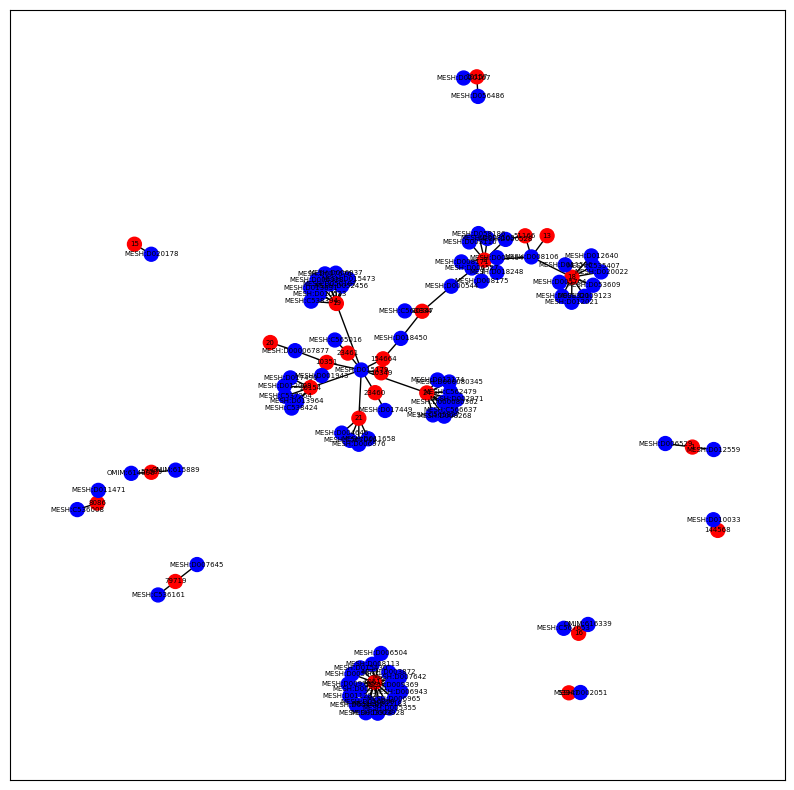

In [35]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

# iterating over the rows of the dataframe with pandas
for index, row in new_dataset.iterrows():
    gene= row['GeneID']
    disease = row['DiseaseID']

    G.add_node(gene, type='gene')
    G.add_node(disease, type= 'disease')

    G.add_edge(gene,disease)
    if index == 100:
        break

colors = ["red" if G.nodes[n]["type"] == "gene" else "blue" for n in G.nodes]
plt.figure(figsize=(10,10))
nx.draw_networkx(G, node_color=colors, with_labels=True, edge_color='black', node_size=100, font_size=5)
plt.show()
